In [2]:
%matplotlib inline
import colorsys
from IPython.display import IFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import random
import math
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from opinion_dynamics.model import odModel
from copy import deepcopy

ModuleNotFoundError: No module named 'pgmpy'

In [2]:
df = pd.read_csv('bbn-data.csv')

In [3]:
df.head()

,Insurance_status,Sex,IN_num,Payment_method,INT_CAPM,Location,Marital_status,Occupation_Insured,Sex_Insured,Relation,Occupation
0,Normal,Male,1 INSUERD,Annual installments,Plan68.2,Level4,Married,MidP,Female,Father,housewife
1,Normal,Female,1 INSUERD,Annual installments,Plan68.2,Level1,Married,HighP,Female,Spouse,housewife
2,Normal,Female,1 INSUERD,Annual installments,Plan68.2,Level1,Married,HighP,Female,Spouse,housewife
3,Normal,Female,1 INSUERD,Annual installments,Plan68.2,Level1,Married,HighP,Female,Spouse,housewife
4,Normal,Male,1 INSUERD,Annual installments,Plan68.2,Level1,Married,HighP,Female,Spouse,housewife


In [4]:
bbnmodel = BayesianModel([('INT_CAPM', 'Payment_method'),('Occupation_Insured', 'Location'),('Occupation_Insured', 'Payment_method'), ('Insurance_status', 'INT_CAPM'), ('Insurance_status', 'IN_num'), ('Insurance_status', 'Location'),('Insurance_status', 'Occupation_Insured'), ('IN_num', 'Sex'), ('Sex', 'Relation'), ('Sex', 'Marital_status'), ('Marital_status', 'Relation'),('Relation', 'Occupation'), ('Marital_status', 'Sex_Insured')])

In [5]:
bbnpe = ParameterEstimator(bbnmodel, df)
print("\n", (bbnpe.state_counts('Insurance_status')/df['Insurance_status'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('IN_num')/df['IN_num'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Marital_status')/df['Marital_status'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Relation')/df['Relation'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Occupation')/df['Occupation'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('INT_CAPM')/df['INT_CAPM'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Occupation_Insured')/df['Occupation_Insured'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Location')/df['Location'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Payment_method')/df['Payment_method'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Sex')/df['Sex'].count()).transpose())  # unconditional
print("\n", (bbnpe.state_counts('Sex_Insured')/df['Sex_Insured'].count()).transpose())  # unconditional


                   Cancellation    Normal
Insurance_status      0.071809  0.928191

 IN_num            1 INSUERD  2 INSUERD
Insurance_status                      
Cancellation       0.050532   0.021277
Normal             0.755319   0.172872

 Marital_status   Married    Single
Sex                               
Female          0.218085  0.018617
Male            0.726064  0.037234

 Relation                 Father  Gmother    Mother    Spouse
Marital_status Sex                                          
Married        Female  0.103723  0.00266  0.055851  0.055851
               Male    0.436170  0.00000  0.095745  0.194149
Single         Female  0.010638  0.00000  0.000000  0.007979
               Male    0.015957  0.00000  0.002660  0.018617

 Occupation       OCC   Student  housewife  underage
Relation                                           
Father      0.000000  0.007979   0.002660  0.555851
Gmother     0.000000  0.000000   0.000000  0.002660
Mother      0.002660  0.002660   0.000

In [6]:
IFrame(src='bbn.html', width=900, height=900)

In [7]:
le = preprocessing.LabelEncoder()
le.fit(df['Insurance_status'])
df['Insurance_status'] = le.transform(df['Insurance_status'])
le.fit(df['IN_num'])
df['IN_num'] = le.transform(df['IN_num'])
le.fit(df['Marital_status'])
df['Marital_status'] = le.transform(df['Marital_status'])
le.fit(df['Relation'])
df['Relation'] = le.transform(df['Relation'])
le.fit(df['Occupation'])
df['Occupation'] = le.transform(df['Occupation'])
le.fit(df['INT_CAPM'])
df['INT_CAPM'] = le.transform(df['INT_CAPM'])
le.fit(df['Occupation_Insured'])
df['Occupation_Insured'] = le.transform(df['Occupation_Insured'])
le.fit(df['Location'])
df['Location'] = le.transform(df['Location'])
le.fit(df['Payment_method'])
df['Payment_method'] = le.transform(df['Payment_method'])
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])
le.fit(df['Sex_Insured'])
df['Sex_Insured'] = le.transform(df['Sex_Insured'])

In [10]:
features = ['Sex', 'IN_num','Payment_method','INT_CAPM','Location','Marital_status','Occupation_Insured','Sex_Insured','Relation','Occupation']
target = ['Insurance_status']
X = df[features]
# Separating out the target
y = df[target]

In [ ]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

100%|██████████| 52/52 [00:03<00:00, 15.11it/s]


Accuracy 0.944


100%|██████████| 52/52 [00:00<00:00, 138.76it/s]


Accuracy 0.944


100%|██████████| 52/52 [00:00<00:00, 176.99it/s]


Accuracy 0.944


100%|██████████| 52/52 [00:00<00:00, 138.06it/s]


Accuracy 0.944


100%|██████████| 52/52 [00:00<00:00, 107.52it/s]


Accuracy 0.944


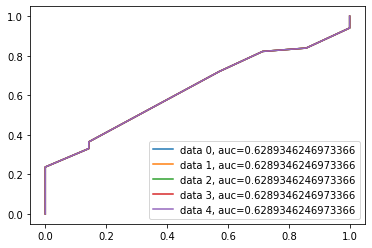

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)
y_pred = bbnmodel.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
y_pred_proba = bbnmodel.predict_probability(X_test).to_numpy()[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
plt.plot(fpr,tpr,label="f1= " + str(f1) + ", auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [8]:
bbnmodel.fit(df)
#model.get_cpds()

In [9]:
bbnmodel.check_model()

True

In [49]:
bbnpe = ParameterEstimator(bbnmodel, df)
model = odModel(N = 200,
                min_eps = 0, 
                max_eps = 0.5, 
                alpha = 2, 
                beta = 4, 
                cr = 'HK', 
                agg = 'mean', 
                ee_rate = 0.02, 
                ext_range = 0, 
                ext_type = 'two side', 
                org = False, 
                mbbn= bbnmodel,
                mpe=bbnpe, 
                mdata = df,
                width = 100, 
                height =100,
                max_iters = 200)
model.run_model ()
base_model = deepcopy(model)

100%|██████████| 1/1 [00:00<00:00, 397.79it/s]


In [50]:
model_out = model.dc.get_model_vars_dataframe()

In [51]:
household_model = deepcopy(base_model)
household_model.promote_users (promoted_users_type='household',      
                         new_customers_rate=0.2, 
                         added_iters=300, 
                         signal_function='logistic')
household_model.run_model ()

100%|██████████| 1/1 [00:00<00:00, 341.19it/s]
/opt/tljh/user/lib/python3.6/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:383: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()
100%|██████████| 1/1 [00:00<00:00, 325.52it/s]


In [52]:
household_model_out =household_model.dc.get_model_vars_dataframe()
household_opinion_dynamics = household_model_out[['Opinion mean', 'Opinion median']]

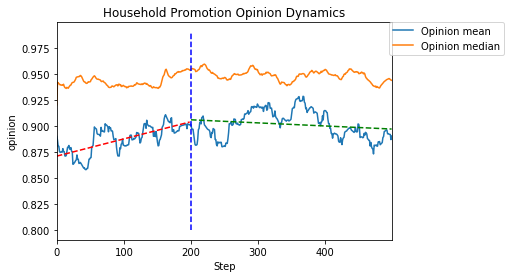

In [82]:
ax = household_opinion_dynamics.plot()
ax.set_title('Household Promotion Opinion Dynamics')
ax.set_xlabel('Step')
ax.set_ylabel('opinion')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))
x = range(1,200)
z = np.polyfit(x, household_opinion_dynamics['Opinion mean'][1:200], 1)
p = np.poly1d(z)
plt.plot(p(x),'r--')
x = range(200,500)
z = np.polyfit(x, household_opinion_dynamics['Opinion mean'][200:500], 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'g--')
x=np.full(20,200)
y=np.arange(0.8,1,0.01)
plt.plot(x, y, 'b--')

In [54]:
student_model = deepcopy(base_model)
student_model.promote_users (promoted_users_type='student',      
                            new_customers_rate=0.2, 
                            added_iters=300, 
                            signal_function='logistic')
student_model.run_model ()

100%|██████████| 1/1 [00:00<00:00, 280.86it/s]
/opt/tljh/user/lib/python3.6/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:383: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()
100%|██████████| 1/1 [00:00<00:00, 408.01it/s]


In [55]:
student_model_out =student_model.dc.get_model_vars_dataframe()
student_opinion_dynamics = student_model_out[['Opinion mean', 'Opinion median']]

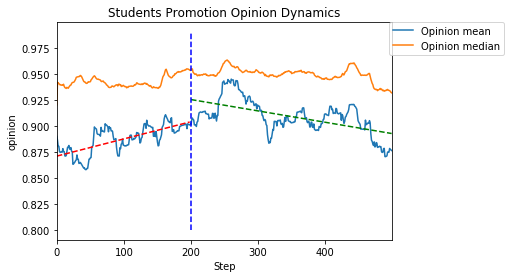

In [81]:
ax = student_opinion_dynamics.plot()
ax.set_title('Students Promotion Opinion Dynamics')
ax.set_xlabel('Step')
ax.set_ylabel('opinion')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))
x = range(1,200)
z = np.polyfit(x, student_opinion_dynamics['Opinion mean'][1:200], 1)
p = np.poly1d(z)
plt.plot(p(x),"r--")
x = range(200,500)
z = np.polyfit(x, student_opinion_dynamics['Opinion mean'][200:500], 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'g--')
x=np.full(20,200)
y=np.arange(0.8,1,0.01)
plt.plot(x, y, 'b--')

In [57]:
level1_model = deepcopy(base_model)
level1_model.promote_users (promoted_users_type='level1',      
                            new_customers_rate=0.2, 
                            added_iters=300, 
                            signal_function='logistic')
level1_model.run_model ()

100%|██████████| 1/1 [00:00<00:00, 327.83it/s]
/opt/tljh/user/lib/python3.6/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:383: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()
100%|██████████| 1/1 [00:00<00:00, 348.05it/s]


In [58]:
level1_model_out =level1_model.dc.get_model_vars_dataframe()
level1_opinion_dynamics = level1_model_out[['Opinion mean', 'Opinion median']]

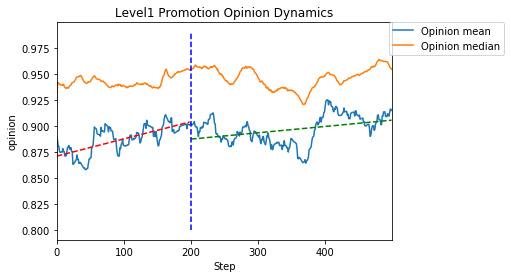

In [80]:
ax = level1_opinion_dynamics.plot()
ax.set_title('Level1 Promotion Opinion Dynamics')
ax.set_xlabel('Step')
ax.set_ylabel('opinion')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))
x = range(1,200)
z = np.polyfit(x, level1_opinion_dynamics['Opinion mean'][1:200], 1)
p = np.poly1d(z)
plt.plot(p(x),"r--")
x = range(200,500)
z = np.polyfit(x, level1_opinion_dynamics['Opinion mean'][200:500], 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'g--')
x=np.full(20,200)
y=np.arange(0.8,1,0.01)
plt.plot(x, y, 'b--')

In [60]:
level4_model = deepcopy(base_model)
level4_model.promote_users (promoted_users_type='level4',      
                            new_customers_rate=0.2, 
                            added_iters=300, 
                            signal_function='logistic')
level4_model.run_model ()

100%|██████████| 1/1 [00:00<00:00, 201.95it/s]
/opt/tljh/user/lib/python3.6/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:383: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()
100%|██████████| 1/1 [00:00<00:00, 400.18it/s]


In [61]:
level4_model_out =level4_model.dc.get_model_vars_dataframe()
level4_opinion_dynamics = level4_model_out[['Opinion mean', 'Opinion median']]

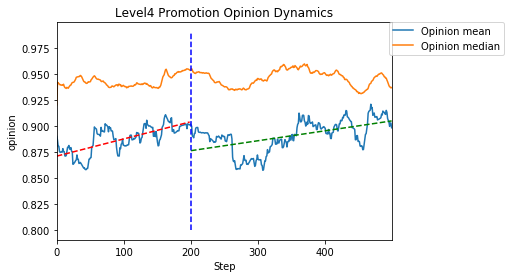

In [79]:
ax = level4_opinion_dynamics.plot()
ax.set_title('Level4 Promotion Opinion Dynamics')
ax.set_xlabel('Step')
ax.set_ylabel('opinion')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))
x = range(1,200)
z = np.polyfit(x, level4_opinion_dynamics['Opinion mean'][1:200], 1)
p = np.poly1d(z)
plt.plot(p(x),"r--")
x = range(200,500)
z = np.polyfit(x, level4_opinion_dynamics['Opinion mean'][200:500], 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'g--')
x=np.full(20,200)
y=np.arange(0.8,1,0.01)
plt.plot(x, y, 'b--')